1. akukan klasifikasi pada data MNIST dengan menggunakan model ANN

2. Anda diperbolehkan melakukan eksplorasi terhadap,
	- Metode pra pengolahan
	- Pemilihan fitur
	- Arsitektur ANN
	- Fungsi Aktiviasi

3. ANN diimplementasikan dengan menggunakan tensorflow.

4. JELASKAN HASIL YANG ANDA DAPATKAN,
	- AKURASI
	- CONFUSION MATRIX
	- KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN
	
	
	
	

# Pra Pengolahan Data

In [3]:
# import
import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
# sklearn
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [8]:
(X_trains, y_trains), (X_test, y_test) = mnist.load_data()

In [10]:
print(len(X_trains))

print(len(X_test))


60000
10000


In [12]:
# Pra-pemrosesan data
X_trains = X_trains / 255.0
y_trains = y_trains / 255.0

In [13]:
# One-hot encoding untuk label
y_trains = to_categorical(y_trains, 10)
y_test = to_categorical(y_test, 10)

In [14]:
# Membangun model ANN
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [15]:
# Konfigurasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
# Pelatihan model
model.fit(X_trains, y_trains, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 2s 1ms/step - loss: 0.0153 - accuracy: 0.9976 - val_loss: 1.0418e-05 - val_accuracy: 1.0000
Epoch 2/10
750/750 [==============================] - 1s 1ms/step - loss: 5.5614e-06 - accuracy: 1.0000 - val_loss: 2.4207e-06 - val_accuracy: 1.0000
Epoch 3/10
750/750 [==============================] - 1s 1ms/step - loss: 1.6817e-06 - accuracy: 1.0000 - val_loss: 9.9356e-07 - val_accuracy: 1.0000
Epoch 4/10
750/750 [==============================] - 1s 1ms/step - loss: 7.4013e-07 - accuracy: 1.0000 - val_loss: 4.9679e-07 - val_accuracy: 1.0000
Epoch 5/10
750/750 [==============================] - 1s 1ms/step - loss: 3.8190e-07 - accuracy: 1.0000 - val_loss: 2.7688e-07 - val_accuracy: 1.0000
Epoch 6/10
750/750 [==============================] - 1s 1ms/step - loss: 2.1279e-07 - accuracy: 1.0000 - val_loss: 1.6209e-07 - val_accuracy: 1.0000
Epoch 7/10
750/750 [==============================] - 1s 1ms/step - loss: 1.2417e-07 - accuracy: 1.0000 

In [17]:
# Evaluasi model pada data pengujian
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Akurasi pengujian:", test_acc)

313/313 [==============================] - 0s 638us/step - loss: 8759.6133 - accuracy: 0.0980
Akurasi pengujian: 0.09799999743700027


In [18]:
# Prediksi label pada data pengujian
predictions = model.predict(X_test)
predicted_labels = [tf.argmax(prediction).numpy() for prediction in predictions]
true_labels = [tf.argmax(label).numpy() for label in y_test]

313/313 [==============================] - 0s 585us/step


In [19]:
# Confusion Matrix
confusion = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[ 980    0    0    0    0    0    0    0    0    0]
 [1135    0    0    0    0    0    0    0    0    0]
 [1032    0    0    0    0    0    0    0    0    0]
 [1010    0    0    0    0    0    0    0    0    0]
 [ 982    0    0    0    0    0    0    0    0    0]
 [ 892    0    0    0    0    0    0    0    0    0]
 [ 958    0    0    0    0    0    0    0    0    0]
 [1028    0    0    0    0    0    0    0    0    0]
 [ 974    0    0    0    0    0    0    0    0    0]
 [1009    0    0    0    0    0    0    0    0    0]]


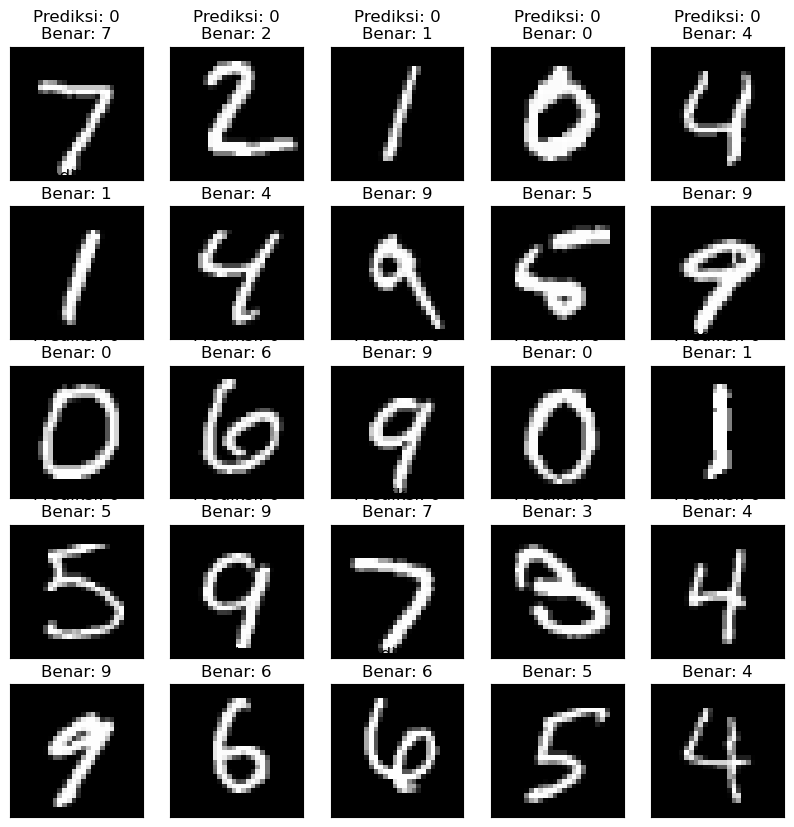

In [20]:
# Menampilkan contoh gambar dan prediksi
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Prediksi: {predicted_labels[i]}\nBenar: {true_labels[i]}")
plt.show()